# Atmosphere Stuff

Messing around and documenting my endeavor with modeling atmospheric properties.


density in wichita: 1.17864195634957 kg/m^3
reynolds numbers for wing... 
 8 m/s: 217917.80170729826 
 18 m/s: 490315.05384142103

reynolds numbers for tail... 
 8 m/s: 77528.44868432726 
 18 m/s: 174439.00953973635


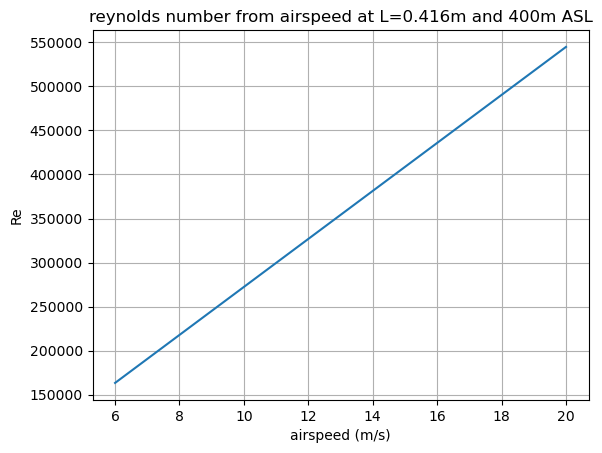

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def density_from_alt(height_asl):
    """ calculate density from altitude 
    @param height_asl: altitude above sea level [m]
    """
    theta = 1 + (-0.000022558) * height_asl
    rho = 1.225 * (theta**4.2561)
    return rho

def reynolds_number_from_alt(airspeed, length_wet, height_asl):
    """ calculate the reynolds number in air from freestream """
    rho = density_from_alt(height_asl)
    mu = 18*10**(-6) # Pa*s, need to get a better approximation for this as well
    re = rho * airspeed * length_wet / mu
    return re

airspeeds = np.linspace(6, 20, 15)

re = []
aspd = []
for v in airspeeds:
    re.append(reynolds_number_from_alt(v, 0.416, 400))
    aspd.append(v)

f = plt.figure()
a = f.add_subplot(1,1,1)
a.plot(aspd, re)
a.set_xlabel('airspeed (m/s)')
a.set_ylabel('Re')
a.set_title(f'reynolds number from airspeed at L={0.416}m and 400m ASL')
a.grid()

print(f'density in wichita: {density_from_alt(400)} kg/m^3')
print(f'reynolds numbers for wing... \n',
    f'8 m/s: {reynolds_number_from_alt(8, 0.416, 400)} \n',
    f'18 m/s: {reynolds_number_from_alt(18, 0.416, 400)}')
print()
print(f'reynolds numbers for tail... \n',
    f'8 m/s: {reynolds_number_from_alt(8, 0.148, 400)} \n',
    f'18 m/s: {reynolds_number_from_alt(18, 0.148, 400)}')
